In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.formula.api as smf

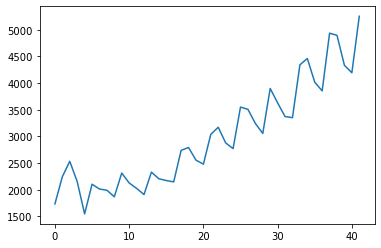

In [2]:
cocacola = pd.read_excel("E:/DataScience/Assignments/Forecasting/CocaCola_Sales_Rawdata.xlsx")
cocacola.Sales.plot()

In [3]:
quarters=['q1','q2','q3','q4']
cocacola['quarter']=0
for i in range(42):
    p = cocacola['Quarter'][i]
    cocacola['quarter'][i] = p[0:2]
dummies = pd.DataFrame(pd.get_dummies(cocacola['quarter'],drop_first=False))
Cocacola = pd.concat([cocacola,dummies], axis = 1)

<ipython-input-3-4d1479c042fc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cocacola['quarter'][i] = p[0:2]
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [4]:
Train = Cocacola.head(36)
Test = Cocacola.tail(15)

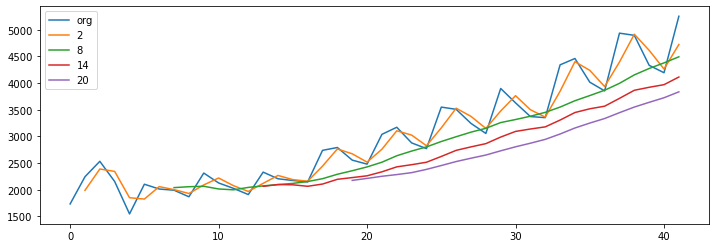

In [5]:
plt.figure(figsize=(12,4))
Cocacola.Sales.plot(label="org")
for i in range(2,24,6):
    Cocacola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

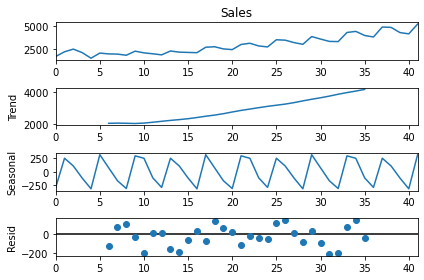

In [7]:
decompose_ts_add = seasonal_decompose(Cocacola.Sales,period=12)
decompose_ts_add.plot()
plt.show()

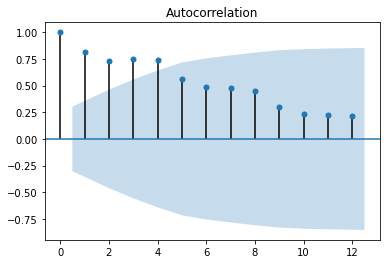

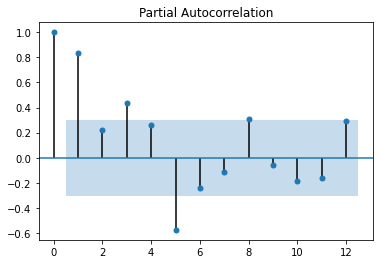

In [8]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Cocacola.Sales,lags=12)
tsa_plots.plot_pacf(Cocacola.Sales,lags=12)
plt.show()

In [9]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [10]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 

12.9291509410616

In [11]:
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

10.808395079734156

In [12]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) 

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


4.9328888912539055

In [13]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

2.7029279726384163

In [14]:
hwe_model_add_add = ExponentialSmoothing(Cocacola["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [15]:
hwe_model_add_add.forecast(10)

42    4944.448446
43    4760.813873
44    4794.873611
45    5679.596175
46    5708.223284
47    5275.591794
48    5156.160832
49    6126.057105
50    5998.837135
51    5520.533456
dtype: float64